<a href="https://colab.research.google.com/github/rgoldschmid/VORQ23-Intro-To-ML/blob/main/VORQ23_Machine_Learning_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einführung in Machine Learning mit Python

## Beispiel: Erkennung der Schwertlilien-Art (Iris) anhand von Messdaten

Eines der bekanntesten Datasets für ML ist das Iris-Dataset (https://archive.ics.uci.edu/dataset/53/iris)

Dafür wurden verschiedene Gattungen von Schwertlilien auf ihre Blütenblatt- und Kelchblatt-Länge untersucht (petal/sepal length).

Folgende Gattungen wurden untersucht:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

### Verständnis für das Dataset

Es ist immer wichtig zu wissen, mit welchen Daten gearbeitet wird. Hier sehen wir visualisiert, mit was wir es zu tun haben:

![Iris](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification-1024x367.png)

## Aufgabe

Anhand der Messdaten wollen wir ein Model trainieren, das die Gattung automatisch erkennen kann, wenn die entsprechenden Blattlängen gegeben sind.

### **Lasst uns anfangen!**

## Importe Verwalten

In unserem Notebook können wir Code-Abschnitte strukturieren. Zu beginn erstellen wir einen Abschnitt, um die Importe zu verwalten. Python bietet zwar viel Funktionalität, jedoch benötigen wir noch weitere Libraries um unsere Aufgabe zu erfüllen.



In [35]:
# Managing all necessary libraries/imports

# Libraries that we are going to need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Task 01: Import datasets
from sklearn.datasets import load_iris

# Task 03: Import train_test_split
from sklearn.model_selection import train_test_split

# Task 05: Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Task 07: Import confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [36]:
 # Task 02: Load iris dataset from sklearn
iris = load_iris()

## Das Datenset laden

Zuerst müssen wir uns das Datenset holen. Glücklicherweise existiert eine Library, welche das Datenset integriert hat.

### Scikit Learn (https://scikit-learn.org/stable/)

Scikit Learn ist eine Open Source Machine Learning Library für Python. Sie enthält eine große Anzahl an bereits implementierten Algorithmen und Funktionalitäten, die wir uns nutze machen können.

---

### **Task 01**

Importiert "datasets" von der Scikit-Learn Library (kurz "sklearn") im Code-Abschnitt zuvor.

*Python Tipp:*
```
# Syntax for importing a library with python
from x import y
```

Details zum Dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

---

### **Task 02**

Speichere das Dataset in einer Variable 'iris'.

*Python Tipp:*
```
# Syntax for creating a variable
variable = "This is a string"
number = 10
```

Dokumentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

### Überprüfung

Wenn alles geklappt hat, sollte der folgende Code-Abschnitt korrekt ausgeführt werden. Das Dataset wird in ein neues Objekt umgewandelt (nicht so wichtig fürs erste) und anschließend werden die ersten 5 Zeilen der Tabelle ausgegeben.

In [37]:
# Converting the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Display the first five rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


## Sets erstellen

Als nächstes erstellen wir uns ein "Feature-Set" (X) und ein "Target-Set" (y).

Im Grund sind das zwei Arrays. Das eine (X) enthält die Daten der Schwertlilien, die sog. Features die meist "X" benannt werden. Das andere (y) enthält die zugehörigen "Targets", also das Label der Gattung, welche zu den Maßen der jeweiligen Zeile gehört. Dieses Array aus Labels wird meist mit "y" benannt.

In [38]:
# Select only sepal length and width as the feature set (X) 
# Select the target species as the target set (y)
X = iris_df.iloc[:, :2].values
y = iris_df.iloc[:, -1].values
print("Unique Targets:")
print(np.unique(y))


Unique Targets:
[0. 1. 2.]


## Training- und Test-Set erstellen

Im nächsten Schritt müssen wir unser Dataset in ein Training-Set und ein Test-Set unterteilen. Mithilfe des Training-Sets werden wir unser Model trainieren. Das heißt, dass das Model aus diesem Set seine Muster erkennt und lernt. Mithilfe des Test-Sets überprüfen wir im Anschluss, wie gut das Model funktioniert. Das Model soll die Daten aus dem Test-Set nicht kennen, um eine unabhängige Übprüfung machen zu können.

Üblicherweise werden 80% der vorhandenen Daten in das Training-Set gesteckt, die übrigen 20% werden für das Test-Set verwendet.

Um die Sets zu erstellen, nutzen wir die Funktion *train_test_split* aus der Scikit-Learn library. 

---

### **Task 03**

Importiert *train_test_split* im ersten Code-Abschnitt.

Versucht über die Dokumentation selbst herauszufinden, wie der Import funktioniert.

Dokumentation *train_test_split*:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


---

### **Task 04**

Erstellt 4 Variablen für die Trainings- und Test-Sets zu den Features (X) und den Targets (y).

Die Variablen müssen folgende Namen haben:

1.   X_train
2.   X_test
3.   y_train
4.   y_test


*Python Tipp:*
```
# Syntax for creating multiple variables at once
a, b, c = ...
```

Die Variablen sollen über die Funktion *train_test_split* befüllt werden. Über die Dokumentation (siehe oben) findet ihr die korrekte Anwendungsweise.

**Beachtet**: Setzt die Größe des Test-Sets auf 20% (0.2) und den random_state auf 1!

In [39]:
# Task 04: Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Classifier erstellen

Der K-Nearest Neighbors Algorithmus ist bereits in der Library implementiert. Um ihn zu nutzen müssen wir *KNeighborsClassifier* importieren.


---


### **Task 05**

Importiert den KNN Classifier im ersten Code-Abschnitt.

Versucht wieder über die Dokumentation selbst herauszufinden, wie der Import funktioniert.

Dokumentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


---

### **Task 06**

Erstelllt den Classifier und nehmt 3 für das "k" (*n_neighbors*). Nutzt auch die Dokumentation (siehe oben).

In [40]:
# Task 06: Creating the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

## Das Model trainieren

Nachdem wir den Classifier erstellt haben, können wir das Model trainieren.


---


### **Task 07**

Für das Training können wir die *.fit()* Methode nutzen. Als Parameter müssen wir die beiden Training-Sets übergeben.

Dokumentation (*.fit()*): https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

In [41]:
# Task 07: Train the model using the training datasets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Accuracy überprüfen

Nachdem das Model trainiert wurde, können wir mithilfe des Test-Sets eine sog. "prediction" machen. Wir testen also das Model auf seine genauigkeit.


---

### **Task 08**

Für den Test der Genauigkeit und anschließender Visualisierung müssen wir noch zwei letzte Methoden importieren: *confusion_matrix* und *accuracy_score* aus dem *metrics*-Modul der Scikit-Learn Library.

Versucht wieder über die Dokumentation selbst herauszufinden, wie der Import funktioniert.

Dokumentation (*metrics*): https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Dokumentation (*confusion_matrix*): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Dokumentation (*accuracy_score*): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


---

### **Task 09**

Führt die *.predict()* Methode des Classifiers (*knn*) aus und übergebt als Parameter unser Test-Set (Achtung, nur das Test-Set mit den Features, also *X*).

Speichert das Ergebnis in einer Variable *y_pred*.

Dokumentation (*.predict()*): https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

In [42]:
# Task 09: Predict the class for the test dataset
y_pred = knn.predict(X_test)



---


### **Task 10**

Gebt nun die Genauigkeit mithilfe der *accuracy_score*-Methode aus (Dokumentation siehe oben). Als Parameter benötigen wir die Targets aus dem Test-Set und die gespeicherten Werte unserer Prediction.

*Python Tipp:*
```
# Syntax for printing strings/variables:
print("Returnvalue of some function:", function(x, y))
```

In [43]:
# Task 10: Model Accuracy
accuracy = accuracy_score(y_test, y_pred)



---


### **Task 11**

Ruft nun die Funktion *confusion_matrix()* auf, um eine Confusion Matrix zu erzeugen. Mit ihrer Hilfe können wir sehen, wie unser Model im Detail abgeschnitten hat. Als Parameter benötigen wir wieder die Targets aus dem Test-Set und die gespeicherten Werte unserer Prediction.

Das Ergebnis speichern wir in einer Variable *cm*.

In [44]:
# Task 11: Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  0  0]
 [ 0  9  4]
 [ 0  3  3]]


## Visuelle Einsicht in unser Model

Nun können wir uns noch ansehen, wie der Algorithmus gearbeitet hat. Damit bekommen wir ein Verständnis darüber, wie unser Model funktioniert und wo wir eventuell noch etwas verbessern können.

### Visualisierung der Features unseres Datensets

Bevor wir unser Model ansehen, schauen wir uns einmal das Datenset genauer an. In nachfolgendem Plot sehen wir die verschiedenen Blumen und ihre Sepal Breite bzw. Höhe. 

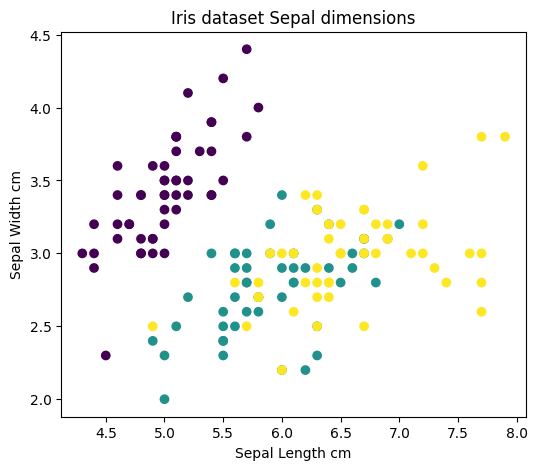

In [45]:
plt.figure(figsize=(6, 5))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris.target)
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.title('Iris dataset Sepal dimensions')
plt.show()

## Visualisierung des Models

Nun sehen wir uns an, wie unser Model die Grenzen gesetzt hat:

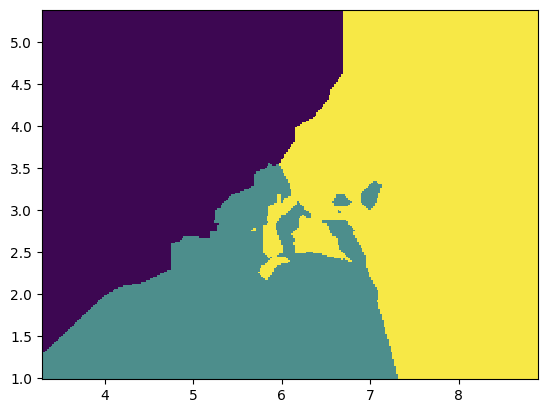

In [46]:
h = .02
cmap_light = ListedColormap(['#3D0752', '#4D8E8C', '#F7E846'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Zeit zu experimentieren!

Nun könnt ihr euch austoben. Der erste Schritt, wäre den "k"-Wert unseres Algorithmuses anzupassen, und zu sehen, wie sich die Genauigkeit verändert. Erstellt dann auch den letzten Plot neu, uns seht euch an, wie sich die Grenzen verändert haben!

### Ausblick

Wenn ihr euch weiter damit beschäftigen wollt, nehmt alle Werte des Datasets in den Algorithmus mit hinein, und seht euch an, wie sich die Genauigkeit verändert. Dazu müsst ihr die Aufbereitung der Daten anpassen. Lasst euch aber nicht entmutigen, wenn ihr euch mit Python oder ML allgemein noch schwer tut. Das war erst der Anfang eurer Reise in die Welt des Machine Learnings! :-)

**Alles Gute!**